In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00


In [ ]:
#importing all the essential libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import re #for data pre-processing
import unicodedata #library for data pre-processing
from transformers import BertTokenizer, BertForSequenceClassification, BertConfig, BertModel
import torch
import torch.nn as nn
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#mounting drive to collab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Reading file from drive
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file.csv')

In [ ]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
df['labels'] = df['labels'].apply(lambda x: 1 if x == "good" else (0 if x == "bad" else x))

In [ ]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",1
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",1
4,4,"As of 2 minutes ago, @OpenAI released their ne...",0


In [ ]:
# Geting unique values in the "Sentiment" column
unique_values = df['labels'].unique()

print(unique_values)


['neutral' 1 0]


In [ ]:
#checking for any null values
df['labels'].value_counts()

0          107796
1           56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
Sentiment_0 = df[df['labels'] == 0]
Sentiment_1 = df[df['labels'] == 1]

#Selecting Equal no of Positive and Negative Reviews
num_samples = 25000
sample_df = pd.concat([Sentiment_0.sample(n=num_samples, random_state=42),
                        Sentiment_1.sample(n=num_samples, random_state=42)])

# Shuffling the sampled DataFrame
df = sample_df.sample(frac=1, random_state=42)

df.head()

,Unnamed: 0,tweets,labels
48585,48585,Mostly my ChatGPT results are great. Mostly…,1
134306,134306,Kenyatta Office of the First Daughter #ChatGPT...,0
58447,58447,People are busy asking coding-related question...,0
48361,48361,Can't argue with that #ChatGPT. https://t.co/W...,0
102807,102807,The best explanation of ChatGPT I’ve seen yet....,1


In [ ]:
df['labels'].value_counts()

1    25000
0    25000
Name: labels, dtype: int64

In [ ]:
#Assigning X & y with review and sentiment respectively

X = df['tweets']
y = df['labels']

In [ ]:
#splitting values in to train, validation and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.7,stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.57, random_state=42)

In [ ]:
#chceking the length of the train, validation and test sets

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Training set size: 15000
Test set size: 19950
Validation set size: 15050


In [ ]:
#seeing the index locations for the variables

print(X_train.index)
print(X_test.index)
print(X_val.index)

Int64Index([ 53803,  54975,  65599,  36474, 112416, 121646, 117930,  49394,
              1434, 149625,
            ...
            124706, 119115,  12881,  44901,  69819,  85472,  88061,  73876,
             32723, 113597],
           dtype='int64', length=15000)
Int64Index([ 44304,  94878,   9430, 142168,  99395, 217271,  62583,  89837,
            122861,  56014,
            ...
            143861, 122808,  79204,   9404, 170798,  80815, 104316, 149091,
             37057,  39480],
           dtype='int64', length=19950)
Int64Index([ 21805, 187453, 131376,  30052,  65874,  30301,  33721,  61836,
            100833,  22134,
            ...
            109108, 214914, 210093,  19132, 179654,  95519,  35404, 209914,
            122515,  32435],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)

In [ ]:
# Verifying the updated index values

print(X_train.index)
print(X_test.index)
print(X_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
#Printing the data brfore pre processing

print(X_train[0])
print(X_test[0])
print(X_val[0])

Fun with #openai (ChatGPT experiment) + #shadertoy (GLSL playground)🤖🎇 Follow more early results from the community on the tag https://t.co/5ztfvbXoQ6 https://t.co/kTzhHU9zOo
I am incredibly proud to be part of team building the infrastructure needed for one of the best AI service in the world. #ChatGPT https://t.co/M96rasF2PB
The Machine Will Speak With You Now https://t.co/CTvU4CLpwD


In [ ]:
#seeing the index locations for the variables

print(y_train.index)
print(y_test.index)
print(y_val.index)

Int64Index([ 53803,  54975,  65599,  36474, 112416, 121646, 117930,  49394,
              1434, 149625,
            ...
            124706, 119115,  12881,  44901,  69819,  85472,  88061,  73876,
             32723, 113597],
           dtype='int64', length=15000)
Int64Index([ 44304,  94878,   9430, 142168,  99395, 217271,  62583,  89837,
            122861,  56014,
            ...
            143861, 122808,  79204,   9404, 170798,  80815, 104316, 149091,
             37057,  39480],
           dtype='int64', length=19950)
Int64Index([ 21805, 187453, 131376,  30052,  65874,  30301,  33721,  61836,
            100833,  22134,
            ...
            109108, 214914, 210093,  19132, 179654,  95519,  35404, 209914,
            122515,  32435],
           dtype='int64', length=15050)


In [ ]:
#resetting the index locations

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

In [ ]:
print(y_train.index)
print(y_test.index)
print(y_val.index)

RangeIndex(start=0, stop=15000, step=1)
RangeIndex(start=0, stop=19950, step=1)
RangeIndex(start=0, stop=15050, step=1)


In [ ]:
print(y_train[0])
print(y_test[0])
print(y_val[0])

1
1
0


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Remove punctuation and non-alphabetic tokens
    tokens = [token for token in tokens if token.isalpha()]

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Join tokens back to a cleaned text
    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Preprocessing the data

X_train_preprocessed = [preprocess_text(text) for text in X_train]

X_test_preprocessed = [preprocess_text(text) for text in X_test]

X_val_preprocessed = [preprocess_text(text) for text in X_val]


In [ ]:
#Printing pre processed data

print(X_train_preprocessed[0])
print(X_test_preprocessed[0])
print(X_val_preprocessed[0])

fun openai chatgpt experiment shadertoy glsl playground follow early result community tag http http
incredibly proud part team building infrastructure needed one best ai service world chatgpt http
machine speak http


Tokenizing and creating datasets for train, validation and test sets so they can be used through out different types of training sessions and evaluation of diferent models

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Tokenizing and encoding the train data
X_train_encoded = tokenizer.batch_encode_plus(
    X_train_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
# Tokenizing and encoding the validation data
X_val_encoded = tokenizer.batch_encode_plus(
    X_val_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
# Extracting input tensors from the encoded data
input_ids_train = X_train_encoded['input_ids']
attention_masks_train = X_train_encoded['attention_mask']
y_train = y_train.astype(np.int64)
labels_train = torch.tensor(y_train.values)
labels_train = labels_train.to(torch.int64)

input_ids_val = X_val_encoded['input_ids']
attention_masks_val = X_val_encoded['attention_mask']
y_val = y_val.astype(np.int64)
labels_val = torch.tensor(y_val.values)
labels_val = labels_val.to(torch.int64)

# Creating datasets
train_dataset = TensorDataset(input_ids_train, attention_masks_train, labels_train)
val_dataset = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
# Tokenizing and encoding the test data
X_test_encoded = tokenizer.batch_encode_plus(
    X_test_preprocessed,
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)

In [ ]:
# Extracting input tensors and attention masks from the encoded data

input_ids_test = X_test_encoded['input_ids']
attention_masks_test = X_test_encoded['attention_mask']
y_test = y_test.astype(np.int32)
labels_test = torch.tensor(y_test.values)
labels_test = labels_test.to(torch.int64)

# Creating datasets
test_dataset = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:
# Setting the device (CPU or GPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 1. Adam Optimizer

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 256
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAO.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.42249468320210776, Validation Accuracy: 0.9169435215946844
Epoch 2/5, Loss: 0.205984827486674, Validation Accuracy: 0.9356146179401993
Epoch 3/5, Loss: 0.13346831079324087, Validation Accuracy: 0.9469102990033222
Epoch 4/5, Loss: 0.0916031014362971, Validation Accuracy: 0.9509634551495016
Epoch 5/5, Loss: 0.06711842208504677, Validation Accuracy: 0.9519601328903654


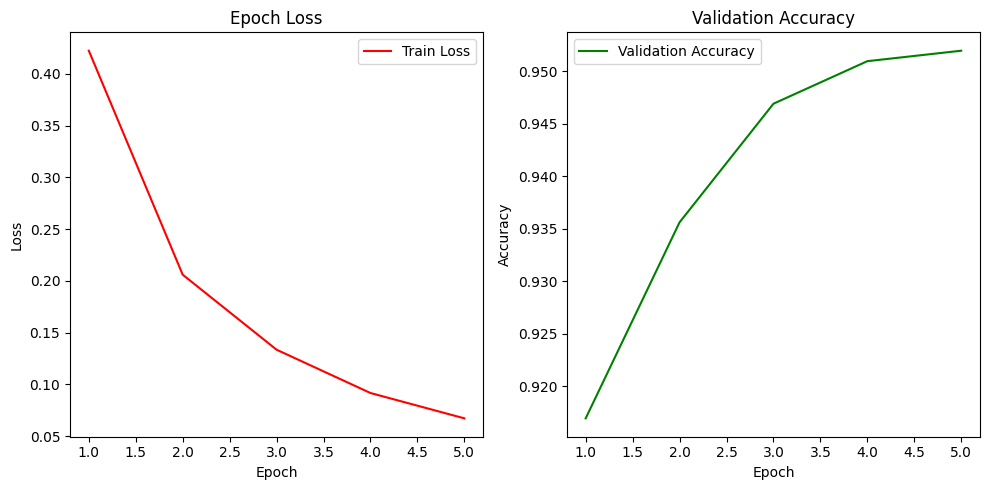

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/GPTBBAO_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAO.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 94.80%
Classification Report:
               precision    recall  f1-score   support

    negative       0.95      0.95      0.95     10012
    positive       0.95      0.95      0.95      9938

    accuracy                           0.95     19950
   macro avg       0.95      0.95      0.95     19950
weighted avg       0.95      0.95      0.95     19950

Confusion Matrix:
 [[9518  494]
 [ 544 9394]]


# 2 Adam Optimizer with Cosine Anneaing LR Scheduler




In [ ]:
from torch.optim.lr_scheduler import CosineAnnealingLR

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 256
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.Adam(model.parameters(), lr=2e-5)
scheduler = CosineAnnealingLR(optimizer, T_max=5, eta_min=1e-6)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks,labels = labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAO1.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.4216792995770772, Validation Accuracy: 0.913156146179402
Epoch 2/5, Loss: 0.20491414266427357, Validation Accuracy: 0.933953488372093
Epoch 3/5, Loss: 0.1422667743841807, Validation Accuracy: 0.9413289036544851
Epoch 4/5, Loss: 0.10803072638114293, Validation Accuracy: 0.946312292358804
Epoch 5/5, Loss: 0.09019215961297353, Validation Accuracy: 0.9475747508305647


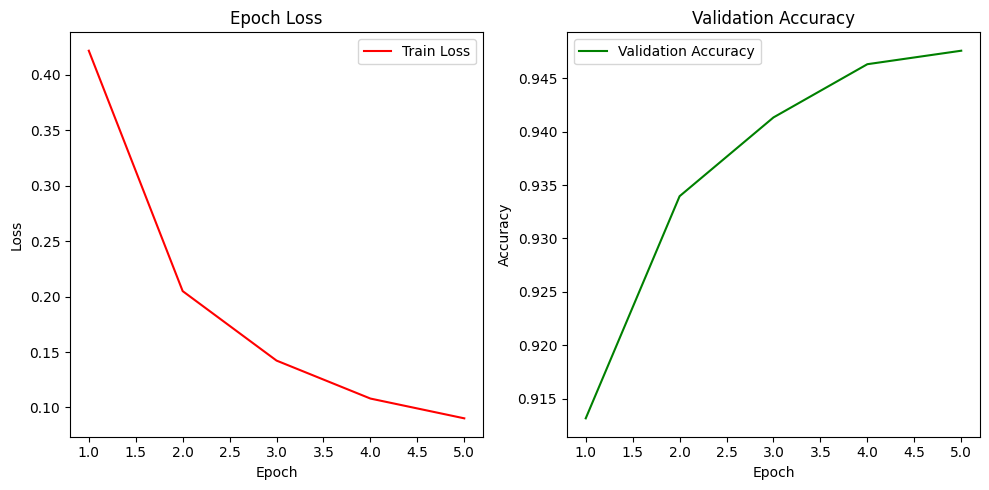

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/GPTBBAO1_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAO1.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 94.41%
Classification Report:
               precision    recall  f1-score   support

    negative       0.94      0.94      0.94     10012
    positive       0.94      0.94      0.94      9938

    accuracy                           0.94     19950
   macro avg       0.94      0.94      0.94     19950
weighted avg       0.94      0.94      0.94     19950

Confusion Matrix:
 [[9456  556]
 [ 559 9379]]


# 3 Lamb Optimizer with Exponential LR Scheduler




In [ ]:
!pip install torch_optimizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 1.4 MB/s eta 0:00:00


In [ ]:
from torch_optimizer import Lamb
from torch.optim.lr_scheduler import ExponentialLR

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# declaring Hyperparameters
batch_size = 256
early_stopping_patience = 3
epochs_without_improvement = 0
num_cpu = 12
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = Lamb(model.parameters(), lr= 2e-5)
scheduler = ExponentialLR(optimizer, gamma=0.95)

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBLO.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.7413037771860759, Validation Accuracy: 0.4980066445182724
Epoch 2/5, Loss: 0.690414585463206, Validation Accuracy: 0.5661129568106312
Epoch 3/5, Loss: 0.656341001033783, Validation Accuracy: 0.6975415282392027
Epoch 4/5, Loss: 0.624366616153717, Validation Accuracy: 0.7120930232558139
Epoch 5/5, Loss: 0.5990175106366475, Validation Accuracy: 0.7215946843853821


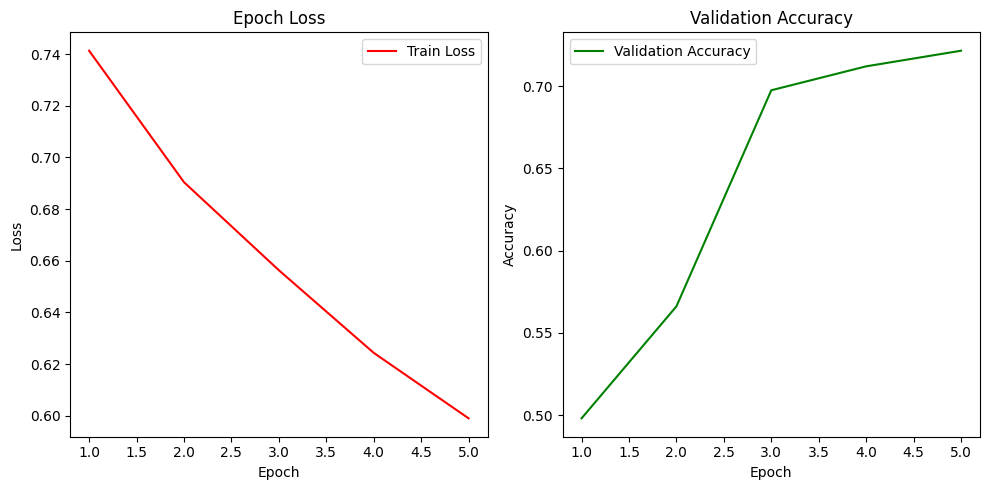

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/GPTBBLO_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBLO.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 72.08%
Classification Report:
               precision    recall  f1-score   support

    negative       0.72      0.74      0.73     10012
    positive       0.73      0.70      0.72      9938

    accuracy                           0.72     19950
   macro avg       0.72      0.72      0.72     19950
weighted avg       0.72      0.72      0.72     19950

Confusion Matrix:
 [[7380 2632]
 [2938 7000]]


# 4 Adagrad Optimizer with ReduceLROnPlateau LR Scheduler




In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

batch_size = 256
num_cpu = 12

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# declaring Hyperparameters

early_stopping_patience = 3
epochs_without_improvement = 0
num_epochs = 5
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optimizer = optim.Adagrad(model.parameters(), lr=2e-5)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=1, verbose=True)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step(epoch_loss)


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAG.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.5358056920846304, Validation Accuracy: 0.8413953488372093
Epoch 2/5, Loss: 0.3851339462280273, Validation Accuracy: 0.8758803986710963
Epoch 3/5, Loss: 0.3268308192412058, Validation Accuracy: 0.8911627906976745
Epoch 4/5, Loss: 0.298835559686025, Validation Accuracy: 0.8988039867109635
Epoch 5/5, Loss: 0.274552238368988, Validation Accuracy: 0.9065116279069767


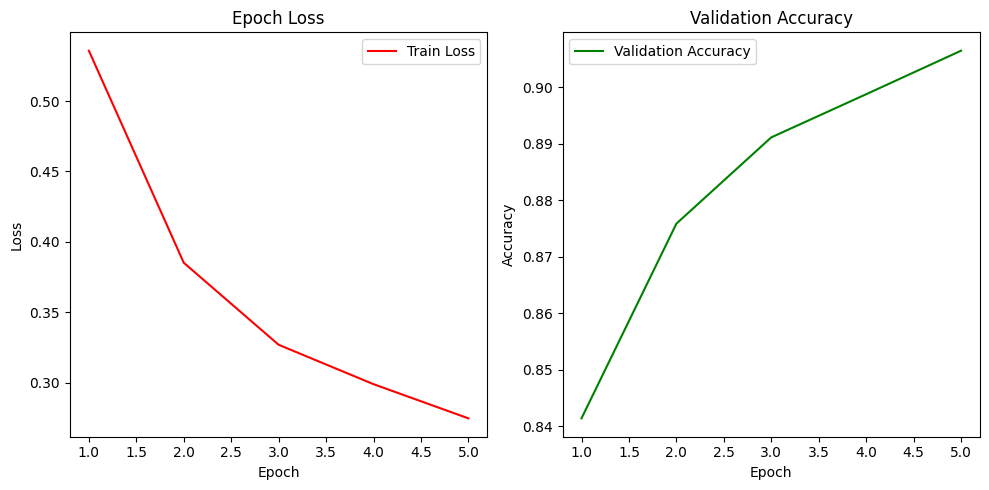

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/GPTBBAG_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAG.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 89.87%
Classification Report:
               precision    recall  f1-score   support

    negative       0.90      0.90      0.90     10012
    positive       0.90      0.90      0.90      9938

    accuracy                           0.90     19950
   macro avg       0.90      0.90      0.90     19950
weighted avg       0.90      0.90      0.90     19950

Confusion Matrix:
 [[8989 1023]
 [ 997 8941]]


# 5 AdamW Optimizer with get linear schedule with warmup LR Scheduler




In [ ]:
from transformers import get_linear_schedule_with_warmup

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

num_cpu = 12
batch_size = 256

# Creating data loaders
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# declaring Hyperparameters

early_stopping_patience = 3
epochs_without_improvement = 0
num_epochs = 5
steps_per_epoch = len(train_dataloader)
total_steps = num_epochs * steps_per_epoch
best_accuracy = 0.0
train_losses = []
val_accuracies = []
train_losses.clear()
val_accuracies.clear()

# optimizer
optimizer = optim.AdamW(model.parameters(), lr=2e-5, eps=1e-08)
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0.1 * total_steps, num_training_steps=total_steps)

for epoch in range(num_epochs):
    running_loss = 0.0

    # Training
    model.train()
    for inputs, attention_masks, labels in train_dataloader:
        inputs = inputs.to(device)
        attention_masks = attention_masks.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_masks, labels = labels)

        loss = outputs.loss

        loss.backward()

        optimizer.step()

        running_loss += loss.item() * inputs.size(0)


    # Calculate average loss for the epoch
    epoch_loss = running_loss / len(train_dataset)
    train_losses.append(epoch_loss)

    scheduler.step()


   # Validation
    model.eval()  # Setting model to evaluation mode
    correct_predictions = 0
    total_predictions = 0

    with torch.no_grad():
        for inputs, attention_masks, labels in val_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            # Get model's predictions
            outputs = model(inputs, attention_mask=attention_masks)
            predicted_labels = torch.argmax(outputs.logits, dim=1)

            correct_predictions += (predicted_labels == labels).sum().item()
            total_predictions += labels.size(0)

    accuracy = correct_predictions / total_predictions
    val_accuracies.append(accuracy)


    if accuracy > best_accuracy:
        best_accuracy = accuracy
        epochs_without_improvement = 0
        best_model_state = model.state_dict()
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("Early stopping triggered.")
            break

    # Printing the loss and accuracy for each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}, Validation Accuracy: {accuracy}")

# Saving the trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAW.pt"
torch.save(best_model_state, BERT_Tuned_file)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5, Loss: 0.7094088107744853, Validation Accuracy: 0.5023255813953489
Epoch 2/5, Loss: 0.6876108948071797, Validation Accuracy: 0.6554817275747509
Epoch 3/5, Loss: 0.6090404822985331, Validation Accuracy: 0.7471760797342193
Epoch 4/5, Loss: 0.4952105485121409, Validation Accuracy: 0.8312292358803987
Epoch 5/5, Loss: 0.38429148920377093, Validation Accuracy: 0.8801993355481728


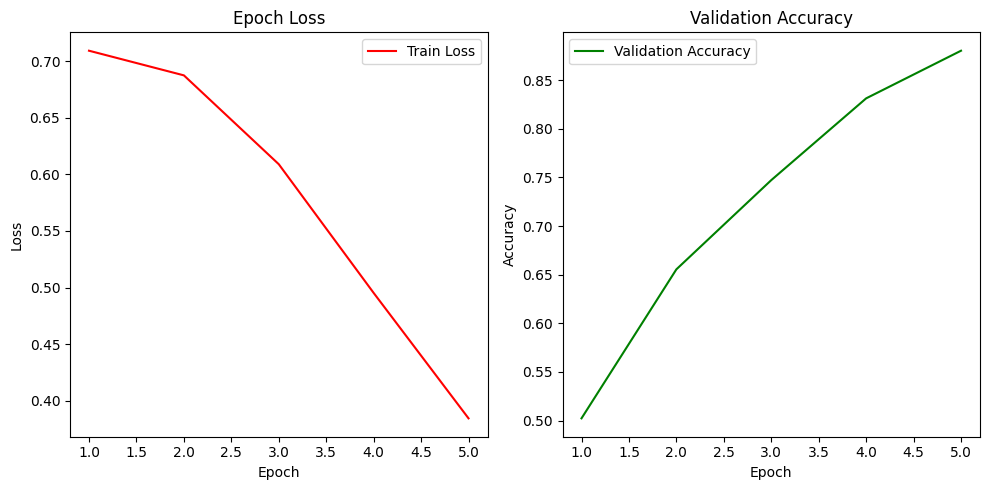

In [ ]:
# Plotting epoch loss and validation accuracy graphs
num_epochs = len(train_losses)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

save_path = "/content/drive/MyDrive/Colab Notebooks/GPTBBAW_plot.png"
plt.savefig(save_path)

plt.tight_layout()
plt.show()

In [ ]:
# Loading trained model
BERT_Tuned_file = "/content/drive/MyDrive/Colab Notebooks/GPTBBAW.pt"
model.load_state_dict(torch.load(BERT_Tuned_file))
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model.to(device)

# Creating dataloaders for test
batch_size = 256
num_cpu = 12

test_dataloader = DataLoader(test_dataset, batch_size=batch_size, num_workers=num_cpu, pin_memory=True, shuffle=False)

# Evaluating the model on the test set
all_preds = []
all_labels = []

all_preds.clear()
all_labels.clear()

with torch.no_grad():
        for inputs, attention_masks, labels in test_dataloader:
            inputs = inputs.to(device)
            attention_masks = attention_masks.to(device)
            labels = labels.to(device)

            outputs = model(inputs, attention_mask=attention_masks)
            _, preds = torch.max(outputs.logits, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

# Calculating evaluation metrics
accuracy = accuracy_score(all_labels, all_preds) * 100

class_names = ["negative", "positive"]
class_report = classification_report(all_labels, all_preds, target_names=class_names)
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f"Accuracy: {accuracy:.2f}%")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 87.42%
Classification Report:
               precision    recall  f1-score   support

    negative       0.87      0.88      0.88     10012
    positive       0.88      0.87      0.87      9938

    accuracy                           0.87     19950
   macro avg       0.87      0.87      0.87     19950
weighted avg       0.87      0.87      0.87     19950

Confusion Matrix:
 [[8787 1225]
 [1285 8653]]


In [ ]:
user_input = input("Enter a sentence: ")
preprocessed_input = preprocess_text(user_input)
encoded_input= tokenizer.batch_encode_plus(
    [preprocessed_input],
    padding=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)
input_ids = encoded_input['input_ids'].to(device)
attention_masks_test = encoded_input['attention_mask'].to(device)

with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_masks_test)
    logits = outputs.logits
    predicted_label = torch.argmax(logits, dim=1).item()

class_names = ["negative", "positive"]
predicted_sentiment = class_names[predicted_label]
print("Predicted sentiment:", predicted_sentiment)

Enter a sentence: uumm yeah can see it
Predicted sentiment: positive
